### Identificar doenças a partir de dados de exames
**Uso de Classificadores - Regressão Logística** <br>
Verificar se um registro dentro da nossa base é um tumor maligno ou não. 


In [16]:
import pandas as pd

from sklearn.linear_model import LogisticRegression ## Classificador
from sklearn.model_selection import train_test_split ## Método - Separador do dataset
from mlxtend.plotting import plot_confusion_matrix ## Métodos para métricas
from sklearn.metrics import confusion_matrix, classification_report ## Métodos para métricas

In [18]:
df = pd.read_csv('breast-cancer.csv')

In [20]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
x = df.drop(columns=['id', 'diagnosis'], axis=1) ## Eliminar coluna id por privacidade e diagnosis porque será nosso eixo y

In [22]:
y = df['diagnosis']

In [26]:
modelo = LogisticRegression(max_iter=10000) ## Definir o máximo de iterações

In [27]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y)

In [28]:
modelo.fit(x_treino, y_treino)

LogisticRegression(max_iter=10000)

In [29]:
y_previsto = modelo.predict(x_teste)

In [33]:
cm = confusion_matrix(y_previsto, y_teste) ## Matriz de consufão nos permite avaliar se nosso modelo está funcionando corretamente

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

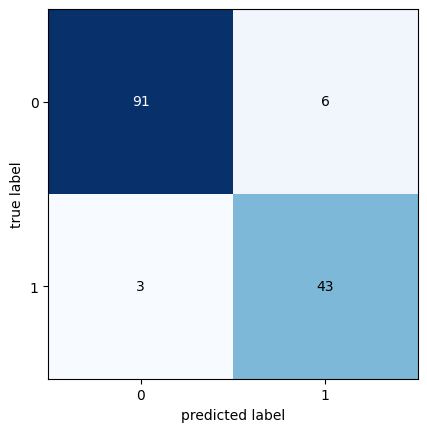

In [32]:
plot_confusion_matrix(cm)

Predicted label (Valor previsto): 49 casos sendo Malignos (1) e 94 casos sendo Benignos (0) <br>
True label (Valores verdadeiros):  46 casos de tumores Malignos e 97 casos de tumores Benignos


In [34]:
 print(classification_report(y_previsto, y_teste))

              precision    recall  f1-score   support

           B       0.97      0.94      0.95        97
           M       0.88      0.93      0.91        46

    accuracy                           0.94       143
   macro avg       0.92      0.94      0.93       143
weighted avg       0.94      0.94      0.94       143



Accuracy: A Proporção de previsões corretas feitas pelo modelo. (Soma das diagonais 91 + 43 dividido pelo todo) <br>
Precision: A precisão para cada classe individualmente. No caso do benigno, 91 dividido por 94 (91 valores corretos, 94 valores previstos) <br>
Recall: A proporção de positivos reais que foram corretamente identificados como positivos pelo modelo. No caso do benigno: 91/97 (Horizontal) <br>
F1-Score:  Uma média harmônica entre a precisão e a revocação, ponderando ambas as métricas de forma equilibrada.

#### Interpretação: <br>
- Precision: Em outras palavras, indica a confiabilidade do modelo quando ele diz que um tumor é maligno. <br> 0.88 significa que, para cada 10 previsões de tumores malignos feitas pelo modelo, 88 são realmente malignos. As 12 restantes são benignos classificados incorretamente como malignos (falsos positivos).<br>
- Recall: Indica a capacidade do modelo de não perder nenhum caso de tumor maligno. <br> No nosso caso, 0.93 significa que o modelo identificou corretamente 93% dos tumores malignos reais. Os 7% restantes foram classificados incorretamente como benignos (falsos negativos).
- F1-score: Oferece uma visão geral do desempenho do modelo, considerando tanto a precisão quanto a capacidade de identificar todos os casos relevantes. <br>
0.91 indica que o modelo tem um bom desempenho geral, mas há espaço para melhora, especialmente na redução de falsos positivos (aumentar a precisão para 0.97 seria ideal).

**Nosso foco de melhora é o Recall Maligno (0.93)** <br>
Um recall maligno baixo significa que o modelo está classificando incorretamente alguns tumores malignos como benignos. Isso pode levar a consequências graves para os pacientes. <br>
O custo de um falso negativo (perder um caso de tumor maligno) é muito maior do que o custo de um falso positivo (classificar um tumor benigno como maligno).